Problem 1
1.1) y(x) = T(a + bx1)can shatter a,b,c. VCD = 1
    This is a line and it can shatter b and c in thi specific arrangement but if two dots were to have the same x1 but diff x2 and therefore have a different y, the classifier would fail becuase it is only predicting based on x1.
    
1.2) y(x) = T(a + bx1 + cx2) can shatter a,b,c. VCD = 3
    This is a two dimentional line and can shatter 3 points but not four becuase if the top and bottom were + but the left and right were -, the classifier would fail. Additionally, VCD is d + 1 and since this is a 2d, line, vcd = 3.
    
1.3) y(x) = T((x1 - a)^2 + (x2 - b)^2 + c) can shatter a,b,c,d. VCD = 4
    This is a non-centered circle and it can shatter all the arrangements. 

Problem 2
2.1) H(y) = 6/10 log(10/6) + 4/10 log(10/4) = 0.97095

2.2) x1 = 4/10(3/4 log (4/3) + 1/4 log(4)) + 6/10(1/2 log 2 + 1/2 log 2) = 0.9245, IG = 0.04645
     x2 = 5/10(1/5 log (5) + 4/5 log(5/4)) + 5/10 * 0 = 0.3609, IG = 0.61005
     x3 = 3/10(2/3 log (3/2) + 1/3 log(3)) + 7/10(4/7 log(7/4) + 3/7 log(7/3) = 0.9651, IG = 0.00585
     x4 = 3/10(2/3 log (3/2) + 1/3 log(3)) + 7/10(5/7 log(7/5) + 2/7 log(7/2) = 0.8797, IG = 0.0912
     x5 = 3/10(2/3 log (3/2) + 1/3 log(3)) + 7/10(4/7 log(7/4) + 3/7 log(7/3) = 0.9651, IG = 0.00585
     The highest info gain is splitting at X2.
     
2.3)         x2
       = 1 /    \ = -1
       discard   x1
             1 /    \-1
            read   x4
               1 /    \ -1
               read  discard
            

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

X = np.genfromtxt('X_train.txt', delimiter=None)
Y = np.genfromtxt('Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

print "3.1"

for f in range(0,14):
    F = X[:,f]
    print 'Feature ', f + 1, 'min: ', np.min(F)
    print 'Feature ', f + 1, 'max: ', np.max(F)
    print 'Feature ', f + 1, 'mean: ', np.mean(F)
    print 'Feature ', f + 1, 'var: ', np.var(F)

3.1
Feature  1 min:  193.0
Feature  1 max:  253.0
Feature  1 mean:  241.58774300000002
Feature  1 var:  83.950806887951
Feature  2 min:  152.5
Feature  2 max:  248.0
Feature  2 mean:  227.3859329
Feature  2 var:  92.29796657769758
Feature  3 min:  214.25
Feature  3 max:  252.38
Feature  3 mean:  241.56281370000002
Feature  3 var:  35.300050500092304
Feature  4 min:  152.5
Feature  4 max:  252.38
Feature  4 mean:  232.8259432
Feature  4 var:  97.44001258437376
Feature  5 min:  10.0
Feature  5 max:  31048.0
Feature  5 mean:  3081.98073
Feature  5 var:  15614364.730518669
Feature  6 min:  0.0
Feature  6 max:  13630.0
Feature  6 mean:  920.77918
Feature  6 var:  3020579.876458528
Feature  7 min:  0.0
Feature  7 max:  9238.0
Feature  7 mean:  137.15228
Feature  7 var:  435636.5727708016
Feature  8 min:  0.0
Feature  8 max:  125.17
Feature  8 mean:  3.2591865429
Feature  8 var:  8.244616324135894
Feature  9 min:  1.1031
Feature  9 max:  18.336
Feature  9 mean:  6.4980262600000005
Feature  9 

In [2]:
print '3.2'
Xtr = np.array(X[0:10000])
Ytr = np.array(Y[0:10000])
Xva = np.array(X[10001:20001])
Yva = np.array(Y[10001:20001])

learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=50)
t_error = learner.err(Xtr,Ytr)
v_error = learner.err(Xva,Yva)

print 't_error: ', t_error
print 'v_error: ', v_error


3.2
t_error:  0.0062
v_error:  0.3911


3.3


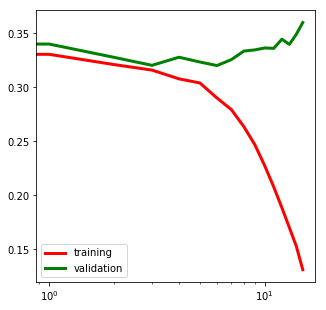

models with higher depth have higher complexity. I recommend 5.


In [3]:
print '3.3'

training = []
validation = []
for i in range(0,16):
    learner = ml.dtree.treeClassify(Xtr, Ytr, maxDepth=i)
    t_error = learner.err(Xtr,Ytr)
    v_error = learner.err(Xva,Yva)
    training.append(t_error)
    validation.append(v_error)

fig, ax = plt.subplots(1, 1, figsize = (5,5))
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
ax.semilogx(r, training, 'r-', lw = 3, label = 'training')
ax.semilogx(r, validation, 'g-', lw = 3, label = 'validation')

ax.legend()
plt.show()
    
print 'models with higher depth have higher complexity. I recommend 5.'

3.4


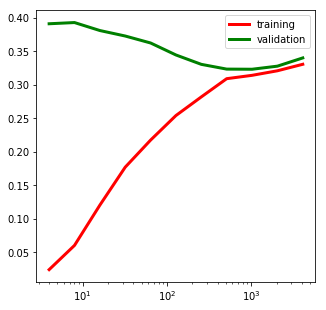

models with higher minparent have lower complexity. I recommend 512.


In [4]:
print '3.4'
training = []
validation = []
mp = []
for i in range(2,13):
    minParent = 2**i
    mp.append(minParent)
    learner = ml.dtree.treeClassify(Xtr, Ytr,minParent, maxDepth=50)
    t_error = learner.err(Xtr,Ytr)
    v_error = learner.err(Xva,Yva)
    training.append(t_error)
    validation.append(v_error)

fig, ax = plt.subplots(1, 1, figsize = (5,5))
ax.semilogx(mp, training, 'r-', lw = 3, label = 'training')
ax.semilogx(mp, validation, 'g-', lw = 3, label = 'validation')

ax.legend()
plt.show()

print 'models with higher minparent have lower complexity. I recommend 512.'

3.5


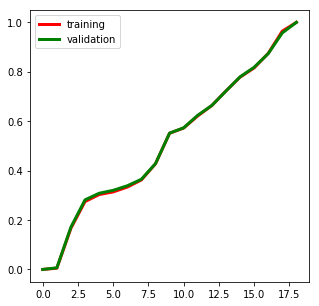

train_auc =  0.6726246402924903
valid_auc =  0.6469518882862543


In [5]:
print '3.5'
learner = ml.dtree.treeClassify(Xtr,Ytr, 512, maxDepth = 5)
train_roc = learner.roc(Xtr, Ytr)
valid_roc = learner.roc(Xva, Yva)
fig, ax = plt.subplots(1, 1, figsize = (5,5))
ax.plot(train_roc[0], 'r-', lw = 3, label = "training")
ax.plot(valid_roc[0], 'g-', lw = 3, label = "validation")

ax.legend()
plt.show()

train_auc = learner.auc(Xtr,Ytr)
valid_auc = learner.auc(Xva,Yva)

print 'train_auc = ', train_auc
print 'valid_auc = ', valid_auc

In [9]:
print '3.6'
Xtr = np.array(X)
Ytr = np.array(Y)
learner = ml.dtree.treeClassify(Xtr, Ytr,2048, maxDepth=15)
Xte = np.genfromtxt('X_test.txt', delimiter=None)
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt("Y_submit.txt", Yte, "%d, %.2f", header="ID,Prob1", comments="", delimiter=",")

print 'Kaggle Username: Karen'
print "Leaderboard AUC: 0.67434"

3.6
Kaggle Username: Karen
Leaderboard AUC: 0.64362


Statement of Collaboration:
For this assignment I had discussed with Jorge Carlos about the difference between MaxDepth and Min parent.